# Phân tích khoảng cách các khu vực Việt Nam

Dữ liệu: `cacKhuVucVietNam_with_distances.csv` chứa thông tin tỉnh/thành, vùng, tọa độ và khoảng cách đến Hà Nội, TP.HCM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

In [2]:
# Load dữ liệu
DATA_PATH = 'cacKhuVucVietNam_with_distances.csv'
df = pd.read_csv(DATA_PATH)
print(f"✅ Đã tải {DATA_PATH} với {len(df)} dòng, {df.shape[1]} cột")
df.head()

✅ Đã tải cacKhuVucVietNam_with_distances.csv với 63 dòng, 9 cột


,stt,province,region,latitude,longitude,distance_to_hanoi_km,distance_to_hcm_km,nearest_city,nearest_distance_km
0,1,Hà Nội,ĐỒNG BẰNG SÔNG HỒNG,21.028333,105.854041,0.0,1137.8,Hà Nội,0.0
1,2,Vĩnh Phúc,ĐỒNG BẰNG SÔNG HỒNG,18.416893,105.695355,290.9,850.3,Hà Nội,290.9
2,3,Bắc Ninh,ĐỒNG BẰNG SÔNG HỒNG,21.328217,106.462526,71.3,1168.3,Hà Nội,71.3
3,4,Quảng Ninh,ĐỒNG BẰNG SÔNG HỒNG,21.171805,107.201274,140.7,1152.3,Hà Nội,140.7
4,5,Hải Dương,ĐỒNG BẰNG SÔNG HỒNG,20.960288,106.360439,53.1,1127.6,Hà Nội,53.1


In [3]:
# Thông tin tổng quan
print("📋 Cột:", df.columns.tolist())
print("\n📌 Kiểu dữ liệu:")
print(df.dtypes)
print("\n🔍 Missing values:")
print(df.isnull().sum())

📋 Cột: ['stt', 'province', 'region', 'latitude', 'longitude', 'distance_to_hanoi_km', 'distance_to_hcm_km', 'nearest_city', 'nearest_distance_km']

📌 Kiểu dữ liệu:
stt                       int64
province                 object
region                   object
latitude                float64
longitude               float64
distance_to_hanoi_km    float64
distance_to_hcm_km      float64
nearest_city             object
nearest_distance_km     float64
dtype: object

🔍 Missing values:
stt                     0
province                0
region                  0
latitude                0
longitude               0
distance_to_hanoi_km    0
distance_to_hcm_km      0
nearest_city            0
nearest_distance_km     0
dtype: int64


In [4]:
# Thống kê mô tả các khoảng cách
stats_cols = ['distance_to_hanoi_km', 'distance_to_hcm_km', 'nearest_distance_km']
describe_df = df[stats_cols].describe().round(2)
print(describe_df)

# Phân bố số tỉnh theo vùng
region_counts = df['region'].value_counts().rename_axis('region').reset_index(name='count')
print("\n📌 Số tỉnh theo vùng:")
print(region_counts)


       distance_to_hanoi_km  distance_to_hcm_km  nearest_distance_km
count                 63.00               63.00                63.00
mean                 639.48              654.09               196.41
std                  486.38              477.59               138.29
min                    0.00                9.50                 0.00
25%                  139.55              179.45                88.75
50%                  605.00              607.80               158.10
75%                 1130.25             1132.70               272.75
max                 1349.20             1345.50               605.00

📌 Số tỉnh theo vùng:
                                 region  count
0         TRUNG DU VÀ MIỀN NÚI PHÍA BẮC     14
1  BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG     14
2               ĐỒNG BẰNG SÔNG CỬU LONG     13
3                   ĐỒNG BẰNG SÔNG HỒNG     11
4                           ĐÔNG NAM BỘ      6
5                            TÂY NGUYÊN      5


In [ ]:
# Histogram khoảng cách đến Hà Nội / TP.HCM
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['distance_to_hanoi_km'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Phân phối khoảng cách đến Hà Nội')
axes[0].set_xlabel('Km')
axes[0].set_ylabel('Số tỉnh')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].hist(df['distance_to_hcm_km'], bins=20, edgecolor='black', alpha=0.7, color='darkorange')
axes[1].set_title('Phân phối khoảng cách đến TP.HCM')
axes[1].set_xlabel('Km')
axes[1].set_ylabel('Số tỉnh')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Top 10 tỉnh xa nhất / gần nhất với Hà Nội
far_hanoi = df.nlargest(10, 'distance_to_hanoi_km')[['province', 'region', 'distance_to_hanoi_km']]
near_hanoi = df.nsmallest(10, 'distance_to_hanoi_km')[['province', 'region', 'distance_to_hanoi_km']]
print("🏔️ Xa Hà Nội nhất:")
print(far_hanoi.to_string(index=False))
print("\n🏡 Gần Hà Nội nhất:")
print(near_hanoi.to_string(index=False))

In [ ]:
# Top 10 tỉnh xa nhất / gần nhất với TP.HCM
far_hcm = df.nlargest(10, 'distance_to_hcm_km')[['province', 'region', 'distance_to_hcm_km']]
near_hcm = df.nsmallest(10, 'distance_to_hcm_km')[['province', 'region', 'distance_to_hcm_km']]
print("🌊 Xa TP.HCM nhất:")
print(far_hcm.to_string(index=False))
print("\n🏙️ Gần TP.HCM nhất:")
print(near_hcm.to_string(index=False))

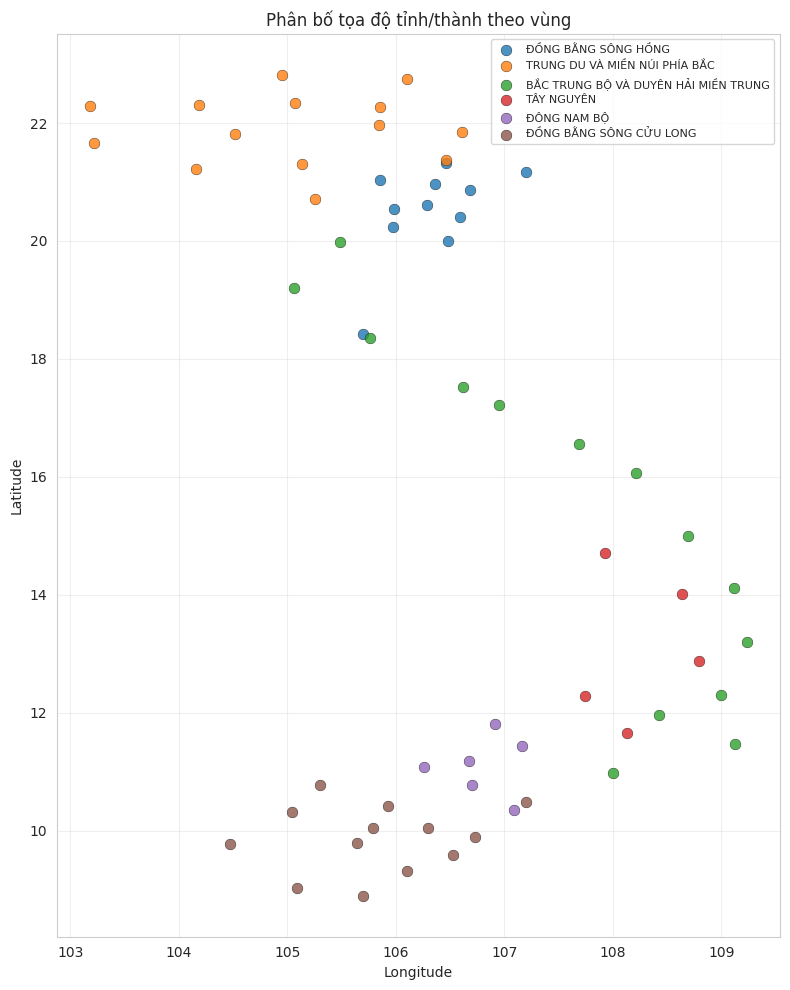

In [5]:
# Scatter tọa độ, tô màu theo vùng
fig, ax = plt.subplots(figsize=(8, 10))
regions = df['region'].unique()
colors = sns.color_palette('tab10', n_colors=len(regions))
for r, c in zip(regions, colors):
    sub = df[df['region'] == r]
    ax.scatter(sub['longitude'], sub['latitude'], label=r, s=60, alpha=0.8, color=c, edgecolor='k', linewidth=0.3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Phân bố tọa độ tỉnh/thành theo vùng')
ax.legend(loc='best', fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()